In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# Load and preprocess data
data = pd.read_csv('C:/Users/danis/Downloads/train.csv/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:28000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[28000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

# Initialize parameters
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

# Activation functions and their derivatives
def LeakyReLU(Z, alpha=0.01):
    return np.maximum(alpha * Z, Z)

def ELU(Z, alpha=1.0):
    return np.where(Z > 0, Z, alpha * (np.exp(Z) - 1))

def ReLU(Z):
    return np.maximum(0, Z)

def LeakyReLU_deriv(Z, alpha=0.01):
    return np.where(Z > 0, 1, alpha)

def ELU_deriv(Z, alpha=1.0):
    return np.where(Z > 0, 1, alpha * np.exp(Z))

def ReLU_deriv(Z):
    return np.where(Z > 0, 1, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_deriv(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))


def forward_prop(W1, b1, W2, b2, W3, b3, X, activation_hidden1, activation_hidden2):
    Z1 = W1.dot(X) + b1
    A1 = activation_hidden1(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = activation_hidden2(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, activation_hidden1_deriv, activation_hidden2_deriv):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = W3.T.dot(dZ3) * activation_hidden2_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * activation_hidden1_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations, activation_hidden1, activation_hidden2, activation_hidden1_deriv, activation_hidden2_deriv):
    W1, b1, W2, b2, W3, b3 = init_params()
    accuracy_list = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X, activation_hidden1, activation_hidden2)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, activation_hidden1_deriv, activation_hidden2_deriv)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            predictions = np.argmax(A3, axis=0)
            accuracy = get_accuracy(predictions, Y)
            accuracy_list.append(accuracy)
            print(f"Iteration {i}: {accuracy}")
    return W1, b1, W2, b2, W3, b3, accuracy_list

def make_predictions(X, W1, b1, W2, b2, W3, b3, activation_hidden1, activation_hidden2):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X, activation_hidden1, activation_hidden2)
    predictions = np.argmax(A3, axis=0)
    return predictions








In [2]:
print("training with LeakyReLU and ELU")
W1, b1, W2, b2, W3, b3, accuracy_list_leaky_elu = gradient_descent(
    X_train, Y_train, 0.10, 500, LeakyReLU, ELU, LeakyReLU_deriv, ELU_deriv)

predictions_test_leaky_elu = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, LeakyReLU, ELU)

training with LeakyReLU and ELU
Iteration 0: 0.12978571428571428
Iteration 10: 0.41585714285714287
Iteration 20: 0.5549285714285714
Iteration 30: 0.6223571428571428
Iteration 40: 0.6672142857142858
Iteration 50: 0.6983571428571429
Iteration 60: 0.7194285714285714
Iteration 70: 0.7374285714285714
Iteration 80: 0.7518571428571429
Iteration 90: 0.7662142857142857
Iteration 100: 0.7760714285714285
Iteration 110: 0.786
Iteration 120: 0.7942142857142858
Iteration 130: 0.8008571428571428
Iteration 140: 0.807
Iteration 150: 0.8131428571428572
Iteration 160: 0.8185
Iteration 170: 0.8218571428571428
Iteration 180: 0.8265714285714286
Iteration 190: 0.8301428571428572
Iteration 200: 0.8340714285714286
Iteration 210: 0.8376428571428571
Iteration 220: 0.84
Iteration 230: 0.8435714285714285
Iteration 240: 0.8461428571428572
Iteration 250: 0.849
Iteration 260: 0.8516428571428571
Iteration 270: 0.8543571428571428
Iteration 280: 0.8571428571428571
Iteration 290: 0.859
Iteration 300: 0.8607142857142858
I

In [5]:
# Training and testing with ReLU
print("training with only ReLU")
W1, b1, W2, b2, W3, b3, accuracy_list_relu = gradient_descent(
    X_train, Y_train, 0.10, 500, ReLU, ReLU, ReLU_deriv, ReLU_deriv)

predictions_test_relu = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, ReLU, ReLU)


training with only ReLU
Iteration 0: 0.061285714285714284
Iteration 10: 0.38485714285714284
Iteration 20: 0.5360714285714285
Iteration 30: 0.6025714285714285
Iteration 40: 0.6502142857142857
Iteration 50: 0.6803571428571429
Iteration 60: 0.7061428571428572
Iteration 70: 0.7249285714285715
Iteration 80: 0.7405
Iteration 90: 0.7514285714285714
Iteration 100: 0.7617857142857143
Iteration 110: 0.7719285714285714
Iteration 120: 0.7818571428571428
Iteration 130: 0.7884285714285715
Iteration 140: 0.7949285714285714
Iteration 150: 0.8018571428571428
Iteration 160: 0.8069285714285714
Iteration 170: 0.8114285714285714
Iteration 180: 0.8168571428571428
Iteration 190: 0.8215714285714286
Iteration 200: 0.8259285714285715
Iteration 210: 0.8290714285714286
Iteration 220: 0.8321428571428572
Iteration 230: 0.8356428571428571
Iteration 240: 0.8384285714285714
Iteration 250: 0.8417142857142857
Iteration 260: 0.8446428571428571
Iteration 270: 0.8473571428571428
Iteration 280: 0.8495714285714285
Iteration 

In [3]:



print("training with Sigmoid")
W1, b1, W2, b2, W3, b3, accuracy_list_sigmoid = gradient_descent(
    X_dev, Y_dev, 0.10, 500, sigmoid, sigmoid, sigmoid_deriv, sigmoid_deriv)

predictions_test_sigmoid = make_predictions(X_dev, W1, b1, W2, b2, W3, b3, sigmoid, sigmoid)


training with Sigmoid
Iteration 0: 0.09596428571428571
Iteration 10: 0.09635714285714286
Iteration 20: 0.13110714285714287
Iteration 30: 0.17439285714285716
Iteration 40: 0.21857142857142858
Iteration 50: 0.2692857142857143
Iteration 60: 0.31835714285714284
Iteration 70: 0.3653571428571429
Iteration 80: 0.4075
Iteration 90: 0.44535714285714284
Iteration 100: 0.48
Iteration 110: 0.5113571428571428
Iteration 120: 0.5383214285714286
Iteration 130: 0.5621785714285714
Iteration 140: 0.5818571428571429
Iteration 150: 0.5983928571428572
Iteration 160: 0.6143214285714286
Iteration 170: 0.6279285714285714
Iteration 180: 0.6394642857142857
Iteration 190: 0.6505
Iteration 200: 0.6611071428571429
Iteration 210: 0.6699285714285714
Iteration 220: 0.6775714285714286
Iteration 230: 0.6866071428571429
Iteration 240: 0.6932857142857143
Iteration 250: 0.7003571428571429
Iteration 260: 0.7065
Iteration 270: 0.713
Iteration 280: 0.7180357142857143
Iteration 290: 0.7240357142857143
Iteration 300: 0.72867857

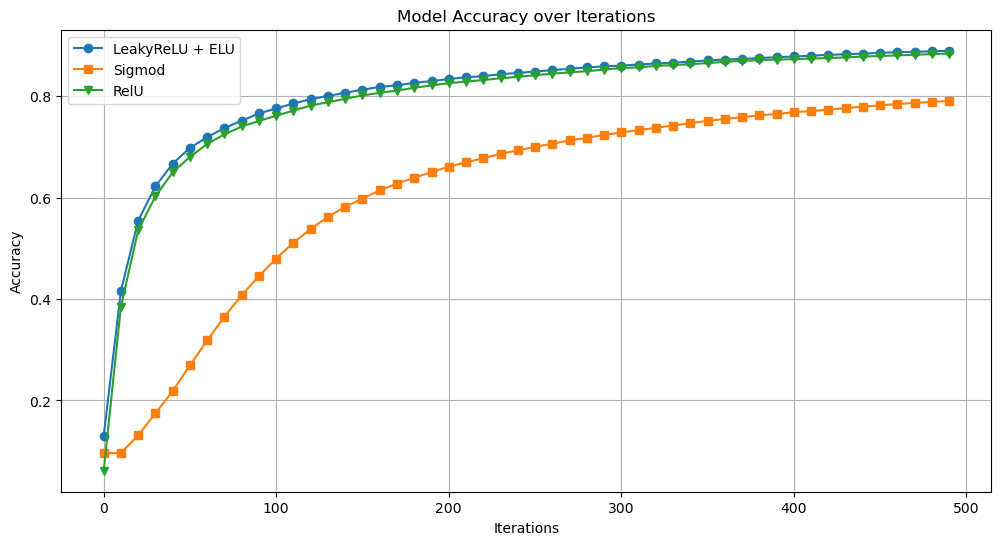

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, 500, 10), accuracy_list_leaky_elu, label='LeakyReLU + ELU', marker='o')
plt.plot(range(0, 500, 10), accuracy_list_sigmoid, label='Sigmod', marker='s')
plt.plot(range(0, 500, 10), accuracy_list_relu, label='RelU', marker= 'v')

plt.xlabel('Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

